# The tendency toward disorder
In this tutorial, we see the tendency of processes toward higher entropy by using a monte carlo simulation.

First, let's start with the randomized lattice from earlier.

m_1, m_2, m_sites = 198 202 400


3.8834744412156037e-21

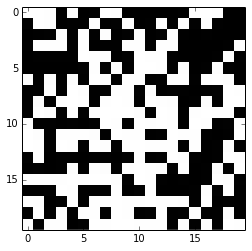

In [243]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from random import random

lattice_width = 20
lattice_height = 20
m_sites = lattice_width*lattice_height
lattice = np.zeros((lattice_height,lattice_width))
m1_to_m2_ratio = 0.5

m_1 = 0
m_2 = 0

for i in range(0,lattice_height):
    for j in range(0,lattice_width):
        random_number = random()
        if random_number > m1_to_m2_ratio:
            lattice[i,j] = 1
            m_1 += 1
        else:
            lattice[i,j] = 2
            m_2 += 1
print 'm_1, m_2, m_sites =', m_1, m_2, m_sites
plt.imshow(lattice,cmap="Greys",interpolation='None')
k_boltzmann = 1.38064852e-23 #m2 kg s-2 K-1
S_m = -1*k_boltzmann*(m_1*np.log(m_1/m_sites)+m_2*np.log(m_1/m_sites))
S_m

## The unmixed macrostate
Now, let's take this lattice and artificially order it. We will use the same number of state 1 and state 2 particles as with our randomized lattice, but this time we will group them together. Let's call this the "unmixed" macrostate. 

Let us ignore the enthalpy of mixing for this demonstration. This would be like tracking two molecules of the same type but with arbirtrary labels that allow us to distinguish them from each other. 

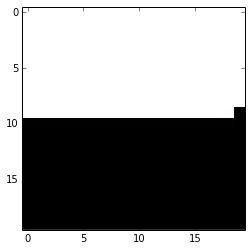

In [244]:
def reset(lattice_height,lattice_width):
    lattice2 = np.zeros((lattice_height,lattice_width))
    counter = 0
    for i in range(0,lattice_height):
        for j in range(0,lattice_width):
            if counter <= m_1:
                lattice2[i,j] = 1
                counter += 1
            else:
                lattice2[i,j] = 2
                counter += 1
    return lattice2
lattice2 = reset(lattice_height,lattice_width)
plt.imshow(lattice2,cmap="Greys",interpolation='None')



## Monte Carlo mixing of the unmixed lattice
Great, so now that we have our unmixed lattice, let's randomly pick sites in the lattice and exchange them with a randomly chosen nearest neighbor either above, below, left, or right of the chosen site.

For this we will assume a periodic boundary condition - that is, the edges of the lattice are neighbors of the opposite edge. 

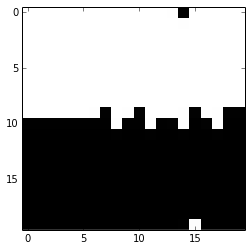

In [245]:
from random import choice
def mix(iterations,lattice): #we will iterate single particle swaps this many times
    lattice2 = lattice
    iterations = iterations
    energy=1 #for later - a cond. for deciding if the new state is better than previous
    condition = 0 # condition for above statement
    for iterate in range(0,iterations):
        random_x_direction = choice([-1,1]) #pick a random direction to search for nrst. nbr
        random_y_direction = choice([-1,1]) #       "
        target_x_coordinate = choice(range(0,lattice_width-1)) # choose a random cell
        target_y_coordinate = choice(range(0,lattice_height-1))
        neighbor_x_coordinate = (target_x_coordinate + random_x_direction)%lattice_width
        #we use modulo on this line for the periodic boundary condition
        neighbor_y_coordinate = (target_y_coordinate + random_y_direction)%lattice_height
        target_value = lattice2[target_x_coordinate, target_y_coordinate]
        neighbor_value = lattice2[neighbor_x_coordinate, neighbor_y_coordinate]
        if energy > condition: # perform the swap!
            lattice2[target_x_coordinate, target_y_coordinate] = neighbor_value
            lattice2[neighbor_x_coordinate, neighbor_y_coordinate] = target_value
        else:
            pass            
    return lattice2 #get back the lattice after several swaps
lattice2 = mix(100,lattice2)
plt.imshow(lattice2,cmap="Greys",interpolation='None')



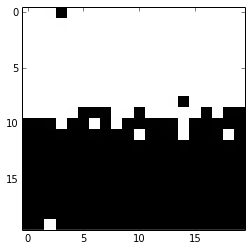

In [246]:
lattice2 = mix(100,lattice2)
plt.imshow(lattice2,cmap="Greys",interpolation='None')

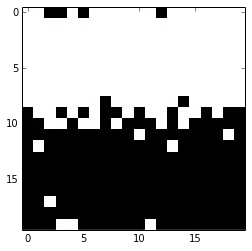

In [247]:
lattice2 = mix(100,lattice2)
plt.imshow(lattice2,cmap="Greys",interpolation='None')

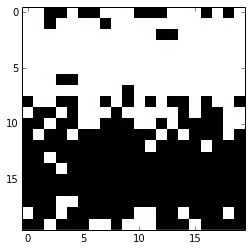

In [248]:
lattice2 = mix(1000,lattice2)
plt.imshow(lattice2,cmap="Greys",interpolation='None')

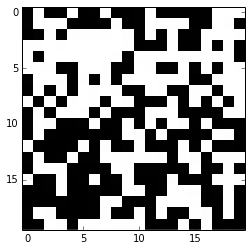

In [249]:
lattice2 = mix(5000,lattice2)
plt.imshow(lattice2,cmap="Greys",interpolation='None')

Let's characterize the trajectory. We can look at each cell, and check if its 4 nearest neighbors match its identity. A high amount of matching should correspond to a very ordered system, and a lot of mismatch means it is more disordered, randomized, closer to a uniform distribution etc. 

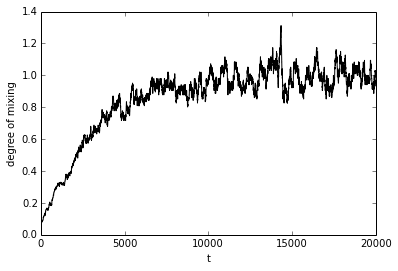

In [252]:
def trajectory(iterations):
    lattice3 = reset(lattice_height,lattice_width)
    trajectory = np.zeros((iterations))
    for t in range(0,iterations):
        number_of_mismatch_edges = 0
        number_of_matching_edges = 0
        deg_of_mixing = 0
        # below we scan the lattice and look right, and below for each cell
        #periodic bond cond means that scanning every cell like this will get every interface
        for i in range(0,lattice_height):
            for j in range(0,lattice_width):                
                #find the nearest neighbors - use modulo to enforce periodic bound. cond.
                
                #examine edge to the right of current cell
                if lattice3[((i+0)%lattice_height),((j+1)%lattice_width)] == lattice3[i,j]: 
                    number_of_matching_edges += 1
                else: 
                    number_of_mismatch_edges += 1
                #examine edge beneath the current cell
                if lattice3[((i-1)%lattice_height),((j+0)%lattice_width)] == lattice3[i,j]:
                    number_of_matching_edges += 1
                else: 
                    number_of_mismatch_edges += 1
#                 print number_of_mismatch_edges
        deg_of_mixing = number_of_mismatch_edges/number_of_matching_edges
        trajectory[t] = deg_of_mixing
        lattice3 = mix(1,lattice3)
    return trajectory
iterations=20000
trajectory = trajectory(iterations)
plt.plot(np.arange(iterations),trajectory,color='black')
plt.xlabel('t')
plt.ylabel('degree of mixing')



As we can see, the system reaches a maximally mixed state after a while and stops changing. This is the stationary distribution, or the point where the rates of transitions from one microstate to another are balanced out. 

In this tutorial, we ignored the effects of enthalpy, essentially treating the two species like identical molecule types. In the next tutorial however, we will examine enthalpic effects on a regular solution. 